In [156]:
import tensorflow as tf

2022-12-19 20:38:12.293996: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-19 20:38:12.590974: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-19 20:38:12.590995: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-19 20:38:13.212913: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

In [158]:
import matplotlib.pyplot as plt
import numpy as np

In [159]:
data_dir = 'LPR/images'

# Load the dataset
image_label_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  labels='inferred',
  label_mode='int',
  class_names=None,
  color_mode='rgb',
  batch_size=32,
  image_size=(256, 256),
  shuffle=True,
  seed=123,
  validation_split=0.2,
  subset='training',
  interpolation='bilinear',
  follow_links=False
)

Found 2033 files belonging to 12 classes.
Using 1627 files for training.


2022-12-19 21:01:39.013679: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-19 21:01:39.013991: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-19 21:01:39.014076: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-12-19 21:01:39.014235: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-12-19 21:01:39.014294: W tensorflow/c

In [175]:
 # Determine the sizes of the train, test, and validation sets
num_train_examples = int(tf.cast(0.6 * tf.cast(image_label_ds.cardinality(),tf.float64), tf.int64))
num_test_examples = int(tf.cast(0.2 * tf.cast(image_label_ds.cardinality(),tf.float64), tf.int64))
num_val_examples = int(tf.cast(0.2 * tf.cast(image_label_ds.cardinality(),tf.float64), tf.int64))

# Split the dataset into train, test, and validation sets
train_ds = image_label_ds.take(num_train_examples)
test_ds = image_label_ds.skip(num_train_examples).take(num_test_examples)
val_ds = image_label_ds.skip(num_train_examples + num_test_examples).take(num_val_examples)


In [176]:
train_ds.save('train_dataset.tf')
test_ds.save('test_dataset.tf')
val_ds.save('val_dataset.tf')

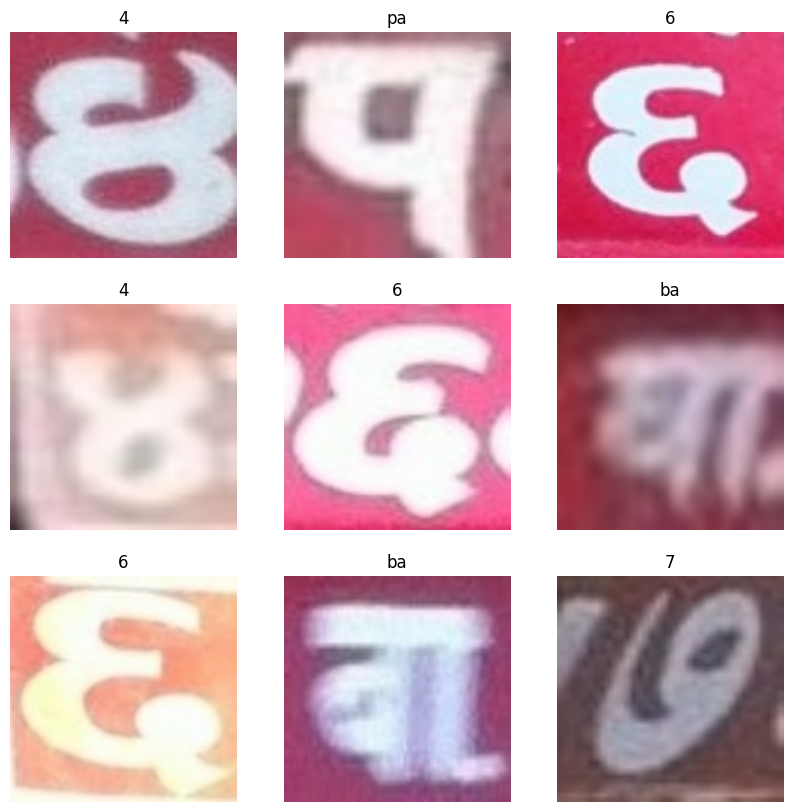

In [177]:
class_names = [0,1,2,3,4,5,6,7,8,9,"ba","pa"]
plt.figure(figsize=(10,10))
for images,labels in train_ds:
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [179]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Rescaling(1./255),
        tf.keras.layers.Conv2D(32, 3, activation="relu"),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(32, 3, activation="relu"),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(32, 3, activation="relu"),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128,activation="relu"),
        tf.keras.layers.Dense(12)
    ]
)


In [181]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

In [182]:
model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 10
)

Epoch 1/10


2022-12-19 21:19:59.896235: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 264257536 exceeds 10% of free system memory.
2022-12-19 21:20:00.194880: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 66064384 exceeds 10% of free system memory.
2022-12-19 21:20:00.255981: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 64000000 exceeds 10% of free system memory.
2022-12-19 21:20:00.559323: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 64000000 exceeds 10% of free system memory.
2022-12-19 21:20:00.636308: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 66064384 exceeds 10% of free system memory.


30/30 [==============================] - ETA: 0s - loss: 2.4619 - accuracy: 0.2021

KeyboardInterrupt: 

: 